In [52]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
%cd "/content/drive/MyDrive/Semestre10/Computación/M2/datasetP"
!ls

/content/drive/MyDrive/Semestre10/Computación/M2/datasetP
augmented  test  train


In [59]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
# Añadir los paths de las carpetas de 'train' y 'test'
train_dir = os.path.join('train')
test_dir = os.path.join('test')

# Empezamos con generación de datos en una variable llamada 'train_datagen'.
# Entrenamos el modelo al mismo tiempo que la generación de datos para no
# perder el tiempo y hacer uso óptimo de la RAM.

# Usamos la función ImageDataGenerator de TensorFlow
train_datagen = ImageDataGenerator(
							rescale = 1./255, # Reescalamos las imágenes
							rotation_range = 10, # Las rotamos levemente (10 grados)
							width_shift_range = 0.2, # Permitimos que se ensanche la imagen
							zoom_range = 0.3, # Hacemos zoom
							horizontal_flip = True) #Volteamos la imagen

# Y BAM! Nuevos datos!

Found 7385 images belonging to 5 classes.


<Figure size 640x480 with 0 Axes>

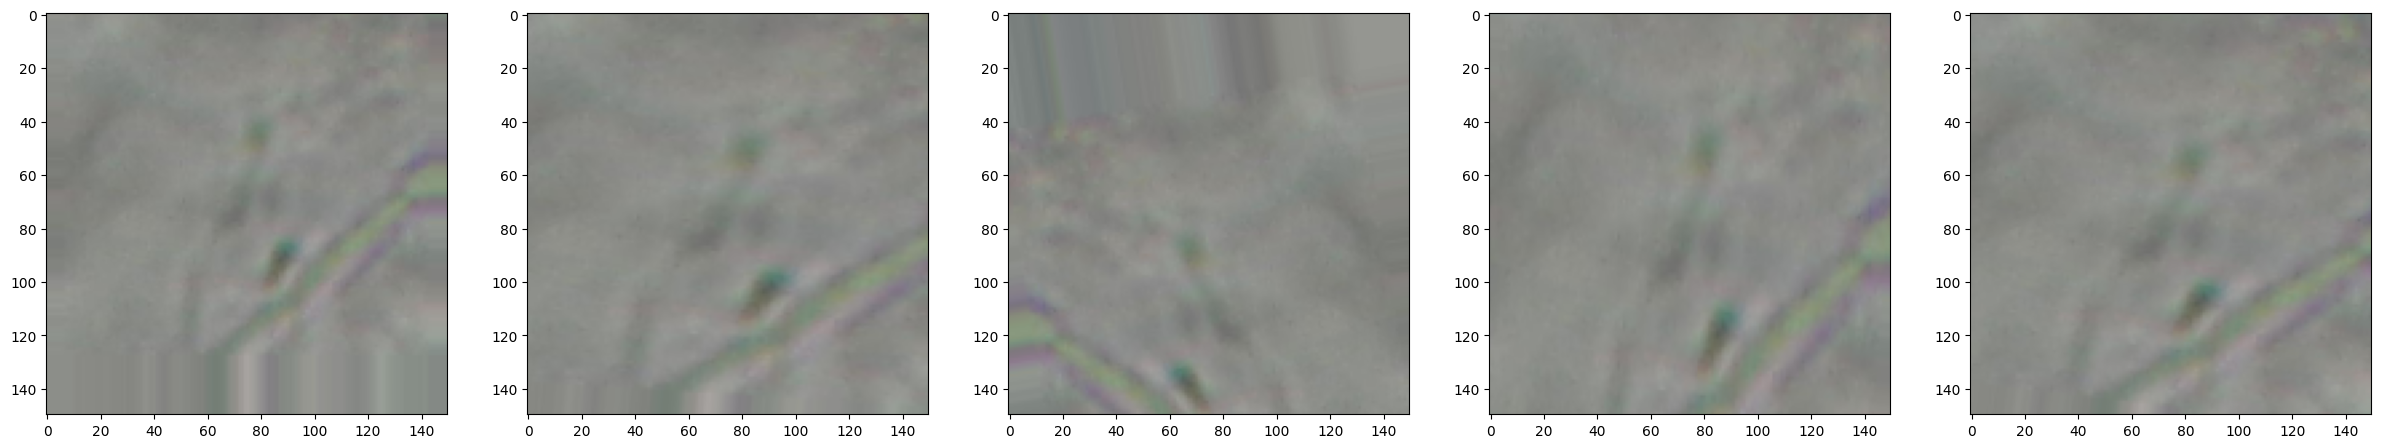

In [61]:
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
train_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (150, 150),
							# batch_size = 1 porque la RAM es un relajo XD
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# Mostramos las nuevas fotos
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 7385 images belonging to 5 classes.
(8, 150, 150, 3)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

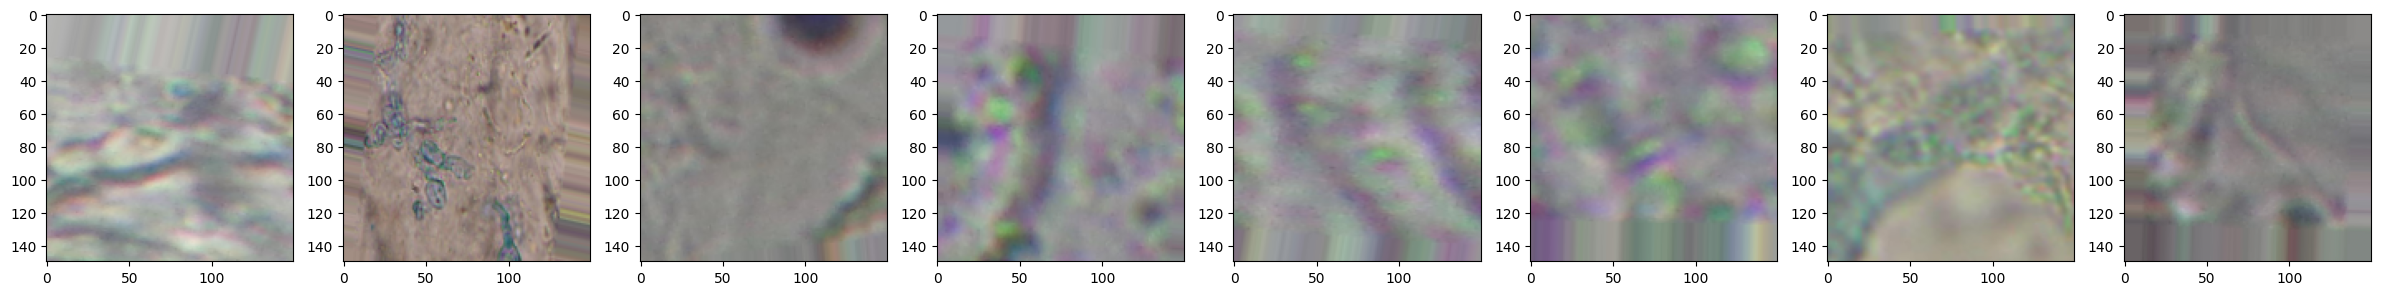

In [62]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [63]:
path = "/content/drive/MyDrive/Semestre10/Computación/M2/datasetP/"

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 7385 images belonging to 5 classes.


In [64]:
# Inicio de la red neuronal convolutiva

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 219040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    56,074,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,075,033 (213.91 MB)

 Trainable params: 56,075,033 (213.91 MB)

 Non-trainable params: 0 (0.00 B)